Notebook 2/2

4. Verification and preparation of the training model to Deployment of the application
step

4.1)  checking dataframes

In this part, we will check the reliability of the SARIMA model by comparing the forecast results with a given part of the game (df_test) which is not affected by the learning process (with SARIMA). and we will prepare the model for deployment.

In [1]:
#Libraries import 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import matplotlib.dates as mdates
import statsmodels
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import sarimax
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset import 
# raw cosumption 
df1 = pd.read_csv("Brut consumption.csv", sep=';', header=0, parse_dates=[0], index_col=0, decimal=',') 
# corrected consumption 
df2= pd.read_csv("Corre_consumption.csv", sep=';', header=0, parse_dates=[0], index_col=0, decimal=',') 
#Removing columns 'Filière' 
df1=df1.drop(columns=['Filière'])
df2=df2.drop(columns=['Filière'])

In [3]:
# Dataframes preprocessing 
df_test=df2[108:118]
df2.drop(df2.index[108:118], inplace=True)
df=np.log(df2)

In [4]:
df.shape

(108, 1)

In [6]:
df_test

,Valeur (TWh)
Date,
2023-01-01,49.863
2023-02-01,42.121
2023-03-01,41.981
2023-04-01,34.072
2023-05-01,31.139
2023-06-01,30.035
2023-07-01,31.930
2023-08-01,30.312
2023-09-01,30.279


In [7]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Dataset split 
size = int(len(df['Valeur (TWh)']) * 0.75)
train1, test1 = df['Valeur (TWh)'][0:size], df['Valeur (TWh)'][size:len(df['Valeur (TWh)'])]
test1 = test1.reset_index()['Valeur (TWh)']
history1 = [x for x in train1]
predictions1 = list()

for t in range(len(test1)):
    model1 = SARIMAX(history1
                    , order=(1, 1, 1) # order = (p,d,q) AR(p)I(d)MA(q)
                    , seasonal_order=(1, 1, 1, 12) # order = (P,D,Q,m) Seasonal AR(P)I(D)MA(Q) m Seasonal Period
                    )
    model_fit = model1.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history1.append(yhat)

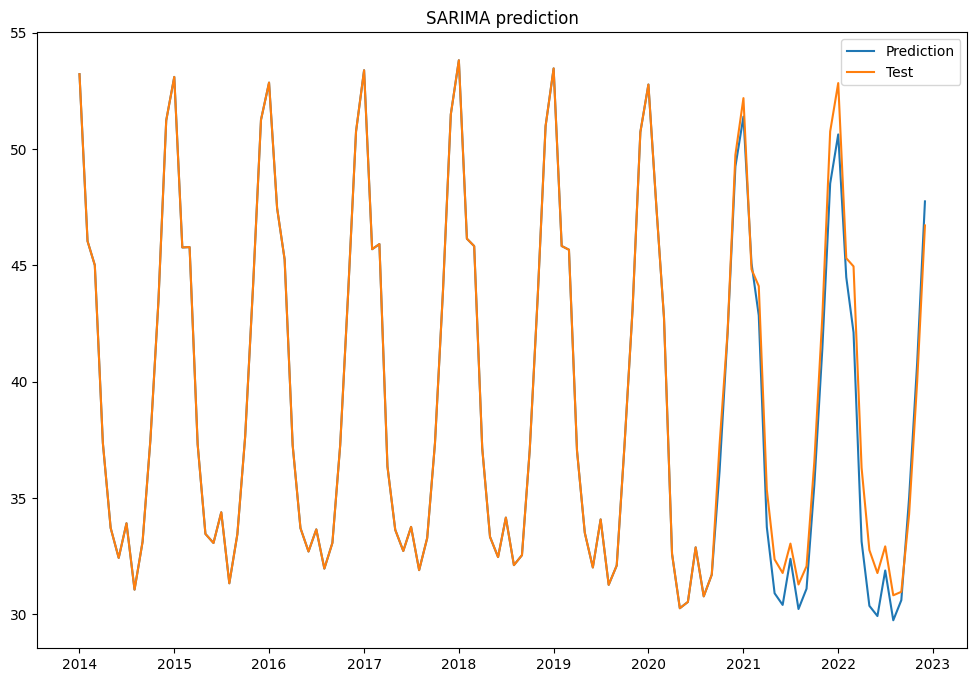

In [8]:
history1 = [x for x in train1]

hist_pred1 = np.concatenate([history1, predictions1])
hist_ts1 = np.concatenate([history1, test1]) 
H_pred1 = pd.DataFrame(hist_pred1, columns=['Values TWh'], index=df.index) #df.index=time axis 
H_test1=pd.DataFrame(hist_ts1, columns=['Values TWh'], index=df.index)
plt.figure(figsize=(12,8))
plt.plot(np.exp(H_pred1), label='Prediction')
plt.plot(np.exp(H_test1), label='Test')
plt.title("SARIMA prediction")
plt.legend()
plt.show()

###########################################################################################################################

4.2) Preparation of  the df-test and df_forecating dataframes for final model verification

In [9]:
#The part not concerned by the learning process with SARIMA
df_test

,Valeur (TWh)
Date,
2023-01-01,49.863
2023-02-01,42.121
2023-03-01,41.981
2023-04-01,34.072
2023-05-01,31.139
2023-06-01,30.035
2023-07-01,31.930
2023-08-01,30.312
2023-09-01,30.279


In [10]:
df2.tail(20)

,Valeur (TWh)
Date,
2021-05-01,32.358
2021-06-01,31.775
2021-07-01,33.039
2021-08-01,31.281
2021-09-01,32.066
2021-10-01,36.557
2021-11-01,42.832
2021-12-01,50.760
2022-01-01,52.839


In [11]:
df2.head()

,Valeur (TWh)
Date,
2014-01-01,53.223
2014-02-01,46.043
2014-03-01,45.010
2014-04-01,37.362
2014-05-01,33.712


In [93]:
# Focrcast function (Corrected consuption forcasting)
Fotcasted=model_fit.predict(start=108, end=215, dynamic=True)
Fotcasted.shape

(108,)

In [94]:
# From array to dataframe of forecasting 
df_forcasting=pd.DataFrame(Fotcasted, columns =['forcasted values'])
df_forcasting


,forcasted values
0,3.908562
1,3.778870
2,3.725322
3,3.485585
4,3.398084
...,...
103,3.250164
104,3.278854
105,3.413112
106,3.566219


In [95]:
# Time fuction preparation 1
Date_index=pd.date_range(start='2023-01', periods=108, freq='M')
Date_index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31',
               ...
               '2031-03-31', '2031-04-30', '2031-05-31', '2031-06-30',
               '2031-07-31', '2031-08-31', '2031-09-30', '2031-10-31',
               '2031-11-30', '2031-12-31'],
              dtype='datetime64[ns]', length=108, freq='M')

In [96]:
# from array to dataframe (time)
df_date=pd.DataFrame(Date_index)
df_date.head()

,0
0,2023-01-31
1,2023-02-28
2,2023-03-31
3,2023-04-30
4,2023-05-31


In [98]:
# Date from YYYY/MM/DD to YYYY/MM
df_date['modified']=df_date[0].dt.strftime('%Y/%m')
df_date['modified']


0      2023/01
1      2023/02
2      2023/03
3      2023/04
4      2023/05
        ...   
103    2031/08
104    2031/09
105    2031/10
106    2031/11
107    2031/12
Name: modified, Length: 108, dtype: object

In [99]:
# To data frame for casting 
df_forcasting=pd.DataFrame(Fotcasted, columns =['forcasted values'])

df_forcasting['forcast_date']=df_date['modified']
df_forcasting=df_forcasting.reindex(columns = ['forcast_date', 'forcasted values'])


df_forcasting.head()



,forcast_date,forcasted values
0,2023/01,3.908562
1,2023/02,3.778870
2,2023/03,3.725322
3,2023/04,3.485585
4,2023/05,3.398084


In [100]:
df_forcasting.isnull().sum()

forcast_date        0
forcasted values    0
dtype: int64

In [19]:
df_forcasting.tail()

,forcast_date,forcasted values
103,2031/08,3.250164
104,2031/09,3.278854
105,2031/10,3.413112
106,2031/11,3.566219
107,2031/12,3.723724


In [101]:
df_test.index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

4.3) Comparison of actual consumption with predicted consumption

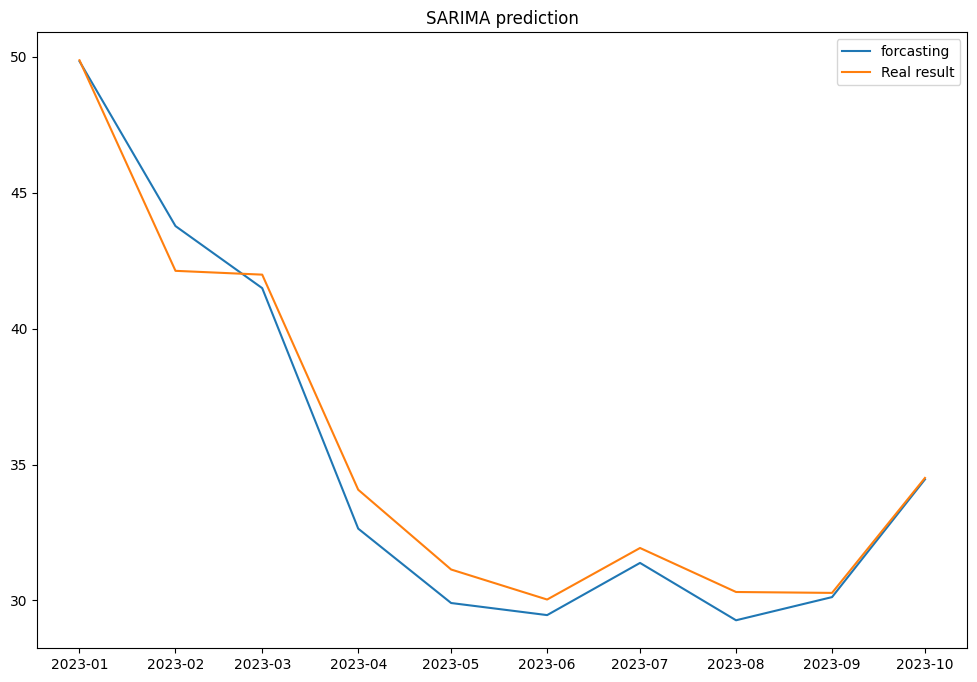

In [103]:
plt.figure(figsize=(12,8))
Forcast = pd.DataFrame(np.exp(df_forcasting['forcasted values'][0:10].values), columns=['Values TWh'], index=df_test.index) #df.index=time axis 
Real=pd.DataFrame(df_test.values, columns=['Values TWh'], index=df_test.index)
plt.plot((Forcast), label='forcasting')
plt.plot(Real, label='Real result')
plt.title("SARIMA prediction")
plt.legend()
plt.show()

In [104]:
Real.head()

,Values TWh
Date,
2023-01-01,49.863
2023-02-01,42.121
2023-03-01,41.981
2023-04-01,34.072
2023-05-01,31.139


In [105]:
Forcast.head()

,Values TWh
Date,
2023-01-01,49.827264
2023-02-01,43.766560
2023-03-01,41.484607
2023-04-01,32.641513
2023-05-01,29.906746


In [106]:
#MSE calculation
MSE=mean_squared_error(Forcast , Real)
print(f'Mean squared error={mean_squared_error(Forcast, Real)}')

Mean squared error=0.8257106418305634


Comment :

We can notice that there is a slight difference between the prediction results and those of reality. This does not call into question our model, but only we must act on the hyper-parameters (p, d,q) and (P,D,Q,s).
By carrying out the evaluation with the MSE, we can notice that the margin of error increases with progress over time because we obtained a larger MSE than the MSE made on the training data set and the prediction.

4.4) correction coefficient


df1: raw consumption 

df2: corrected consuption 

Coeff: correction coefficient 

Coeff=df2/df1 

In [107]:
# Correction coefficient correction
Coeff=df2/df1

In [108]:
Coeff

,Valeur (TWh)
Date,
2014-01-01,1.081768
2014-02-01,1.037005
2014-03-01,1.051636
2014-04-01,1.034958
2014-05-01,0.977159
...,...
2022-08-01,0.969057
2022-09-01,0.976845
2022-10-01,1.065217


In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Dataset split 
size = int(len(Coeff['Valeur (TWh)']) * 0.75)
train_, test_ = Coeff['Valeur (TWh)'][0:size], Coeff['Valeur (TWh)'][size:len(Coeff['Valeur (TWh)'])]
test_ = test_.reset_index()['Valeur (TWh)']
history_ = [x for x in train_]
predictions_ = list()

for t in range(len(test_)):
    model_ = SARIMAX(history_
                    , order=(1, 1, 1) # order = (p,d,q) AR(p)I(d)MA(q)
                    , seasonal_order=(1, 1, 1, 12) # order = (P,D,Q,m) Seasonal AR(P)I(D)MA(Q) m Seasonal Period
                    )
    model_fit_ = model_.fit(disp=False)
    output_ = model_fit_.forecast()
    yhat_ = output_[0]
    predictions_.append(yhat_)
    obs = test_[t]
    history1.append(yhat_)

In [88]:
# Focrcast function (Corrected consuption forcasting)
pred_correc=model_fit_.predict(start=108, end=215, dynamic=True)
pred_correc.shape

(108,)

In [89]:
pred_correc

array([1.03233391, 1.01178707, 1.01867159, 1.00807991, 0.97331445,
       0.99355032, 0.99499339, 0.99405861, 0.99579182, 1.00341673,
       1.01729412, 1.05995766, 1.03201894, 1.01270648, 1.01794039,
       1.00835987, 0.97262011, 0.99251133, 0.99403402, 0.99266775,
       0.99439736, 1.00221051, 1.01652605, 1.05883604, 1.03084836,
       1.01120725, 1.01688062, 1.00703089, 0.97155052, 0.99153351,
       0.993035  , 0.99178361, 0.99351417, 1.00127721, 1.0154761 ,
       1.05788022, 1.02990557, 1.01035196, 1.01590832, 1.00613027,
       0.97058085, 0.9905394 , 0.99204653, 0.99076456, 0.99249487,
       1.00027125, 1.01450119, 1.05688025, 1.02890213, 1.00932523,
       1.01491274, 1.00511561, 0.96958457, 0.98954962, 0.99105526,
       0.98978143, 0.9915118 , 0.99928463, 1.0135063 , 1.05589204,
       1.02791484, 1.00834414, 1.01392336, 1.00413131, 0.96859537,
       0.98855869, 0.99006473, 0.98878873, 0.99051909, 0.99829286,
       1.01251674, 1.05490069, 1.02692325, 1.0073509 , 1.01293

In [111]:
df_forcasting = df_forcasting.assign(Correc_coefficient=pred_correc)

In [113]:
df_forcasting

,forcast_date,forcasted values,Correc_coefficient
0,2023/01,3.908562,1.032334
1,2023/02,3.778870,1.011787
2,2023/03,3.725322,1.018672
3,2023/04,3.485585,1.008080
4,2023/05,3.398084,0.973314
...,...,...,...
103,2031/08,3.250164,0.985817
104,2031/09,3.278854,0.987547
105,2031/10,3.413112,0.995321
106,2031/11,3.566219,1.009544


4.5)User Interface (primtive version)

In [35]:

#Data inputs
from datetime import datetime
import time
Year=input('Year of prediction:')
Month= input('Month of prediction')
a=Year+'/'+Month
print(a)
A = datetime.strptime(a, '%Y/%m')


In [32]:
# Test loop A

date_target=df_forcasting['forcast_date'].values
forcasted_values=df_forcasting['forcasted values'].values
print(len(date_target))
i=0
for i in range(len(date_target)):
    #B=datetime.datetime.strptime(str(date_target[i]), '%Y/%m')
    b=str(date_target[i])
    if b==a:
     print(b)
     print(a)

     print(np.exp(forcasted_values[i]))   # convert result by exp. 
     print((forcasted_values[i]))



108
2023/07
2023/07
31.381300441453632
3.4462121881751258


In [114]:
df_forcasting.head()

,forcast_date,forcasted values,Correc_coefficient
0,2023/01,3.908562,1.032334
1,2023/02,3.778870,1.011787
2,2023/03,3.725322,1.018672
3,2023/04,3.485585,1.008080
4,2023/05,3.398084,0.973314


IV. Deployment of the application

At this phase, our project is ready for deployment as a web-app application/ API interface, or storage in a Devops container or for storage on the Cloud.

Conclusion: 

During the different stages of this project, we were able to create a prediction model for monthly electricity consumption in France using artificial intelligence techniques (Machine Learning).
Initially, we used two csv files as a data source (dataset), using Python's Pandas library to clean, explore and prepare the dataset.
Data preparation made it easier for us to carry out the preprocessing of the studied time series. The preprocessing of time series allows us two learning models widely used for modeling time series.
After testing the models, we chose the SARIMA algorithm. The model we will adopt in the deployment version.